<a href="https://colab.research.google.com/github/AvecToiToujours/poorguy/blob/main/Pandas_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Basics

In [ ]:
# show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# import pandas and numpy
import pandas as pd
import numpy as np

## Create series (rank-1 array with axis labels)

In [ ]:
# create a series by specifying values in a dictionary format
ser = pd.Series({'a': 1, 'b': 2, 'c': 3})
ser

a    1
b    2
c    3
dtype: int64

In [ ]:
# create a series from a list
ser = pd.Series([1, 2, 3]) # index by default starts from 0
ser
print()

# specify index explicitly
ser = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
ser

0    1
1    2
2    3
dtype: int64

a    1
b    2
c    3
dtype: int64

## Create data frame (rank-2 array with row labels)

In [ ]:
# create a data frame by specifying values for each column in a dictionary format
df = pd.DataFrame(
    {"a": [4, 5, 6],
     "b": [7, 8, 9],
     "c": [10, 11, 12]},
     index = [1, 2, 3]) # if not specifying the index, the default index would start with 0
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
# create a data frame by specifying values for each row in a list format
df = pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]],
     index = [1, 2, 3],
     columns = ["a", "b", "c"])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


## Reshape data

In [ ]:
# use melt to transfer wide data to long data

# create a wide data frame
df_wide = pd.DataFrame(
  {"student": ["Andy", "Bernie", "Cindy", "Deb"],
   "english": [10, 100, 1000, 10000],  # english grades
   "math":    [20, 200, 2000, 20000],  # math grades
   "physics": [30, 300, 3000, 30000]   # physics grades
  })
df_wide
print()

# use melt to transfer wide data to long data
df_long = df_wide.melt(
    id_vars = "student",
    var_name = "class",  # new variable name (for different categories)
    value_name = "grade" # new variable name (for different values)
  )
df_long

,student,english,math,physics
0,Andy,10,20,30
1,Bernie,100,200,300
2,Cindy,1000,2000,3000
3,Deb,10000,20000,30000


,student,class,grade
0,Andy,english,10
1,Bernie,english,100
2,Cindy,english,1000
3,Deb,english,10000
4,Andy,math,20
5,Bernie,math,200
6,Cindy,math,2000
7,Deb,math,20000
8,Andy,physics,30
9,Bernie,physics,300


In [ ]:
# Use pivot to transfer long data to wide data
df_long.pivot(
    index = "student",
    columns = "class",
    values = "grade"
  )

class,english,math,physics
student,,,
Andy,10,20,30
Bernie,100,200,300
Cindy,1000,2000,3000
Deb,10000,20000,30000


In [ ]:
# Use pivot_table to transfer long data to wide data (same as using pivot)
df_long.pivot_table(
    index = "student",
    columns = "class",
    values = "grade"
  )

class,english,math,physics
student,,,
Andy,10,20,30
Bernie,100,200,300
Cindy,1000,2000,3000
Deb,10000,20000,30000


In [ ]:
# stack a wide data frame into a long series (multi-indexed: student and class)
df_wide
print('\n')
df_stacked = df_wide.set_index("student").stack()
df_stacked

,student,english,math,physics
0,Andy,10,20,30
1,Bernie,100,200,300
2,Cindy,1000,2000,3000
3,Deb,10000,20000,30000


student         
Andy     english       10
         math          20
         physics       30
Bernie   english      100
         math         200
         physics      300
Cindy    english     1000
         math        2000
         physics     3000
Deb      english    10000
         math       20000
         physics    30000
dtype: int64

In [ ]:
# unstack a long series (multi-indexed: student and class) into a wide data frame
df_stacked.unstack()

,english,math,physics
student,,,
Andy,10,20,30
Bernie,100,200,300
Cindy,1000,2000,3000
Deb,10000,20000,30000


In [ ]:
# append rows of two data frames

# create two data frames
df1 = pd.DataFrame(
  {"a": [0, 1, 2],
   "b": [2, 4, 5],
   "c": [6, 7, 8]},
   index = [1, 2, 3]
 )
df1
print()

df2 = pd.DataFrame(
  {"a": [9, 10, 11],
   "b": [12, 13, 14],
   "c": [15, 16, 17]},
  index = [1, 2, 3]
  )
df2
print()

# append the two data frames vertically, along the rows
pd.concat([df1, df2])

,a,b,c
1,0,2,6
2,1,4,7
3,2,5,8


,a,b,c
1,9,12,15
2,10,13,16
3,11,14,17


,a,b,c
1,0,2,6
2,1,4,7
3,2,5,8
1,9,12,15
2,10,13,16
3,11,14,17


In [ ]:
# append the two data frames horizontally, along the columns
pd.concat([df1, df2], axis = 1)

,a,b,c,a,b,c
1,0,2,6,9,12,15
2,1,4,7,10,13,16
3,2,5,8,11,14,17


In [ ]:
# sort values of a column in a data frame
df.sort_values("a") # ascending order
print()
df.sort_values("a", ascending = False) # descending order

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [ ]:
# sort the index of a data frame
df.sort_index()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
# reset the index of the data frame, and use the default one instead
df_copy = df.copy() # make a copy of the original data frame
df_copy.reset_index()

,index,a,b,c
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [ ]:
# rename columns of a data frame
df.rename(columns = {"a": "A", "b": "B"})

,A,B,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
# drop columns from a data frame
df.drop(columns = ["a", "b"])

,c
1,10
2,11
3,12


In [ ]:
# drop missing values of a column in a data frame

# create a data frame with missing values
df_missing = pd.DataFrame(
  {"a": [1, 2, 3],
   "b": [4, np.NaN, 6],
   "c": [7, 8, 9]})
df_missing

# drop the row with the missing value in column "b"
df_missing.dropna(subset = ["b"])

,a,b,c
0,1,4.0,7
1,2,NaN,8
2,3,6.0,9


,a,b,c
0,1,4.0,7
2,3,6.0,9


In [ ]:
# replace missing values in a data frame
df_missing.replace(np.NaN, 0)

,a,b,c
0,1,4.0,7
1,2,0.0,8
2,3,6.0,9


In [ ]:
# fill missing values by the median of a column
median = df_missing["b"].median()
df_missing["b"].fillna(median, inplace = True)
df_missing

,a,b,c
0,1,4.0,7
1,2,5.0,8
2,3,6.0,9


## Subset observations

In [ ]:
# extract rows that meet a logical criterion
df
print()
df[df["a"] >= 5]

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


,a,b,c
2,5,8,11
3,6,9,12


In [ ]:
# mask rows not meeting a logical criterion with NaN
df.where(df["a"] >= 5)

# replace rows not meeting a logical criterion with -999
df.where(df["a"] >= 5, -999)

,a,b,c
1,NaN,NaN,NaN
2,5.0,8.0,11.0
3,6.0,9.0,12.0


,a,b,c
1,-999,-999,-999
2,5,8,11
3,6,9,12


In [ ]:
# remove duplicate rows

# create a data frame with duplicate rows
df_duplicate = pd.DataFrame(
  [[1, 2, 3],
   [4, 5, 6],
   [1, 2, 3]],
  index = [1, 2, 3],
  columns = ["a", "b", "c"]
  )
df_duplicate
print()

# check duplicates
df_duplicate.duplicated()
print()

# remove one of the duplicate rows
df_duplicate.drop_duplicates()

,a,b,c
1,1,2,3
2,4,5,6
3,1,2,3


1    False
2    False
3     True
dtype: bool

,a,b,c
1,1,2,3
2,4,5,6


In [ ]:
# select first n rows
df.head(2)

,a,b,c
1,4,7,10
2,5,8,11


In [ ]:
# select last n rows
df.tail(2)

,a,b,c
2,5,8,11
3,6,9,12


In [ ]:
# randomly select fraction of rows
df.sample(frac = 0.5)

,a,b,c
2,5,8,11
3,6,9,12


In [ ]:
# randomly select n rows
df.sample(n = 1)

,a,b,c
1,4,7,10


In [ ]:
# select and order top n observations
df
df.nlargest(1, columns = "b")

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


,a,b,c
3,6,9,12


In [ ]:
# select and order bottom n observations
df.nsmallest(1, columns = "b")

,a,b,c
1,4,7,10


## Subset columns

In [ ]:
# select single column by name
df["a"] # option 1 (prefered way)
print()
df.a # option 2

1    4
2    5
3    6
Name: a, dtype: int64

1    4
2    5
3    6
Name: a, dtype: int64

In [ ]:
# select multiple columns with specific names
df[["a", "c"]]

,a,c
1,4,10
2,5,11
3,6,12


In [ ]:
# select columns whose names match regular expression regex (regular expressions)
df.filter(regex = "^a$")

,a
1,4
2,5
3,6


In [ ]:
# use query to select rows (same as: df[df['a'] < 6])
df.query("a < 6")

,a,b,c
1,4,7,10
2,5,8,11


In [ ]:
# select all columns between "a" and "c", including "c"
# (loc: label-based position vs. iloc: integer-based position)
df.loc[:, "a":"c"]

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
# select all columns in positions 1 and 2 (first position is 0)
df.iloc[:, [1, 2]]

,b,c
1,7,10
2,8,11
3,9,12


In [ ]:
# select the second and third rows
df.iloc[[1, 2]]

,a,b,c
2,5,8,11
3,6,9,12


In [ ]:
# select rows meeting logical condition, and only specific columns
df.loc[df["a"] >= 5, ["a", "c"]]

,a,c
2,5,11
3,6,12


## Logic in Python and Pandas

In [ ]:
# not equal to
df1
df2
df1 != df2

,a,b,c
1,0,2,6
2,1,4,7
3,2,5,8


,a,b,c
1,9,12,15
2,10,13,16
3,11,14,17


,a,b,c
1,True,True,True
2,True,True,True
3,True,True,True


In [ ]:
# group membership
df["a"]
print()
df["a"].isin([4, 5])

1    4
2    5
3    6
Name: a, dtype: int64

1     True
2     True
3    False
Name: a, dtype: bool

In [ ]:
# is NaN
df_missing = pd.DataFrame(
  {"a": [1, 2, 3],
   "b": [4, np.NaN, 6],
   "c": [7, 8, 9]})
pd.isnull(df_missing)

,a,b,c
0,False,False,False
1,False,True,False
2,False,False,False


In [ ]:
# is not NaN
pd.notnull(df_missing)

,a,b,c
0,True,True,True
1,True,False,True
2,True,True,True


## Summarize data

In [ ]:
# count number of rows with each unique value of variable
df["a"].value_counts()

4    1
5    1
6    1
Name: a, dtype: int64

In [ ]:
# number of rows of a data frame
len(df)

3

In [ ]:
# number of distinct values in a column
df["a"].unique()

array([4, 5, 6])

In [ ]:
# basic descriptive statistics for each numerical column
df.describe()

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


In [ ]:
# sum values of each column (along the rows) in a data frame
df
df.sum(axis = 0) # axis = 0 is the default, which can be omitted
print()

# sum values of each row (along the columns) in a data frame
df.sum(axis = 1)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


a    15
b    24
c    33
dtype: int64

1    21
2    24
3    27
dtype: int64

In [ ]:
# count non-na/null values of each column
df.count()

a    3
b    3
c    3
dtype: int64

In [ ]:
# quantiles of each column
df.quantile([0.25, 0.5, 0.75])

,a,b,c
0.25,4.5,7.5,10.5
0.50,5.0,8.0,11.0
0.75,5.5,8.5,11.5


In [ ]:
# median, mean, max, min, variance, and standard deviation values of each column
print(df.median())
print(df.mean())
print(df.max())
print(df.min())
print(df.var())
print(df.std())

a     5.0
b     8.0
c    11.0
dtype: float64
a     5.0
b     8.0
c    11.0
dtype: float64
a     6
b     9
c    12
dtype: int64
a     4
b     7
c    10
dtype: int64
a    1.0
b    1.0
c    1.0
dtype: float64
a    1.0
b    1.0
c    1.0
dtype: float64


In [ ]:
# apply a function to each column in a data frame
df
print('\n')
df.apply(np.sum, axis = 0) # axis = 0 is the default and can be omitted
print('\n')
df.apply(lambda x: max(x) - x, axis = 0)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


a    15
b    24
c    33
dtype: int64

,a,b,c
1,2,2,2
2,1,1,1
3,0,0,0


## Make new columns

In [ ]:
# compute and append a new column
df["f"] = df["a"] * df["b"]
print(df)

   a  b   c   f
1  4  7  10  28
2  5  8  11  40
3  6  9  12  54


## (Optional) Bin a column into n buckets

In [ ]:
# cut values of a column into equal-sized n quantiles
# (same number of values in each quantile bucket)
pd.qcut(range(20), 4)

[(-0.001, 4.75], (-0.001, 4.75], (-0.001, 4.75], (-0.001, 4.75], (-0.001, 4.75], ..., (14.25, 19.0], (14.25, 19.0], (14.25, 19.0], (14.25, 19.0], (14.25, 19.0]]
Length: 20
Categories (4, interval[float64, right]): [(-0.001, 4.75] < (4.75, 9.5] < (9.5, 14.25] <
                                           (14.25, 19.0]]

In [ ]:
# cut values of a column into evenly-spaced bins according to the values
# but not the frequency of those values (number of values in a bin may not be the same)
pd.cut([0, 0, 0, 1, 1, 1, 20, 30], 3)

[(-0.03, 10.0], (-0.03, 10.0], (-0.03, 10.0], (-0.03, 10.0], (-0.03, 10.0], (-0.03, 10.0], (10.0, 20.0], (20.0, 30.0]]
Categories (3, interval[float64]): [(-0.03, 10.0] < (10.0, 20.0] < (20.0, 30.0]]

## Vector functions that operate on all columns of a data frame or a single selected column

In [ ]:
# trim values at input thresholds for all columns of a data frame
df
print()
df.clip(lower = 5, upper = 10)

,a,b,c,f
1,4,7,10,28
2,5,8,11,40
3,6,9,12,54


,a,b,c,f
1,5,7,10,10
2,5,8,10,10
3,6,9,10,10


In [ ]:
# OPTIONAL:
# function used to transform one or more columns and
# produce a data frame that has the same axis length as self
# see differences between .transform() and .apply():
# https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df
print()
df.transform(lambda x: x + 1) # same as: df.apply(lambda x: x + 1)

,A,B
0,0,1
1,1,2
2,2,3


,A,B
0,1,2
1,2,3
2,3,4


## Group data

In [ ]:
# return an object grouped by values in a column
animal_speed = pd.DataFrame(
  {"Animal": ["Falcon", "Falcon", "Parrot", "Parrot"],
   "Speed": [380, 370, 24, 26]}
  )
print(animal_speed)
animal_speed.groupby(by = "Animal")

   Animal  Speed
0  Falcon    380
1  Falcon    370
2  Parrot     24
3  Parrot     26


In [ ]:
# return mean, max, min, and count of a groupby object
animal_speed.groupby(by = "Animal", as_index = False).mean()
animal_speed.groupby(by = "Animal", as_index = False).max()
animal_speed.groupby(by = "Animal", as_index = False).min()
animal_speed.groupby(by = "Animal", as_index = False).count()

,Animal,Speed
0,Falcon,375.0
1,Parrot,25.0


,Animal,Speed
0,Falcon,380
1,Parrot,26


,Animal,Speed
0,Falcon,370
1,Parrot,24


,Animal,Speed
0,Falcon,2
1,Parrot,2


In [ ]:
# use agg function to return mean, max, min, and counts of a groupby object
animal_speed.groupby(by = "Animal", as_index = False).agg({"Speed": "mean"})
animal_speed.groupby(by = "Animal", as_index = False).agg({"Speed": "max"})
animal_speed.groupby(by = "Animal", as_index = False).agg({"Speed": "min"})
animal_speed.groupby(by = "Animal", as_index = False).agg({"Speed": "count"})

,Animal,Speed
0,Falcon,375.0
1,Parrot,25.0


,Animal,Speed
0,Falcon,380
1,Parrot,26


,Animal,Speed
0,Falcon,370
1,Parrot,24


,Animal,Speed
0,Falcon,2
1,Parrot,2


In [ ]:
# use agg() to apply a self-defined operation on a groupby object and return statistics
print(animal_speed)
animal_speed.groupby(by = "Animal", as_index = False).agg({"Speed": lambda x: max(x) - min(x)})

   Animal  Speed
0  Falcon    380
1  Falcon    370
2  Parrot     24
3  Parrot     26


,Animal,Speed
0,Falcon,10
1,Parrot,2


In [ ]:
# size of each group (size includes NaN values whereas count does not)
animal_speed.groupby(by = "Animal", as_index = False).size()

,Animal,size
0,Falcon,2
1,Parrot,2


In [ ]:
# OPTIONAL:
# use .transform() with .groupby to create a column in a data frame that has the subgroup means
animal_speed['mean_speed'] = animal_speed.groupby(['Animal'])['Speed'].transform(np.mean)
animal_speed

,Animal,Speed,mean_speed
0,Falcon,380,375.0
1,Falcon,370,375.0
2,Parrot,24,25.0
3,Parrot,26,25.0


## Functions that apply on a per-group basis, and the returned vectors are of the length of the original data frame

In [ ]:
# OPTIONAL:
# copy with values shifted by 1
print(animal_speed)
animal_speed.groupby(by = "Animal", as_index = False).shift(1) # down by 1
animal_speed.groupby(by = "Animal", as_index = False).shift(-1) # up by 1

   Animal  Speed
0  Falcon    380
1  Falcon    370
2  Parrot     24
3  Parrot     26


,Speed
0,NaN
1,380.0
2,NaN
3,24.0


,Speed
0,370.0
1,NaN
2,26.0
3,NaN


In [ ]:
# OPTIONAL:
# ranks with ties getting min/max rank
# method = 'max': the records that have the same values are ranked using the highest rank,
# e.g.: if A and B are both in the 5th and 6th position, rank 6 is assigned.
# method = 'min': the records that have the same values are ranked using the lowest rank,
# e.g.: if A and B are both in the 5th and 6th position, rank 5 is assigned.
print(animal_speed)
animal_speed.groupby(by = "Animal", as_index = False).rank(method = "min")
animal_speed.groupby(by = "Animal", as_index = False).rank(method = "max")

   Animal  Max Speed
0  Falcon        380
1  Falcon        370
2  Parrot         24
3  Parrot         26


,Max Speed
0,2.0
1,1.0
2,1.0
3,2.0


,Max Speed
0,2.0
1,1.0
2,1.0
3,2.0


In [ ]:
# cumulative sum, max, min, or product
animal_speed.groupby(by = "Animal", as_index = False).cumsum()
animal_speed.groupby(by = "Animal", as_index = False).cummax()
animal_speed.groupby(by = "Animal", as_index = False).cummin()
animal_speed.groupby(by = "Animal", as_index = False).cumprod()

,Speed
0,380
1,750
2,24
3,50


,Speed
0,380
1,380
2,24
3,26


,Speed
0,380
1,370
2,24
3,24


,Speed
0,380
1,140600
2,24
3,624


## Optional: Windows

In [ ]:
# return an expanding object allowing summary functions to be applied cumulatively (window size cumulative/increasing)
df_window = pd.DataFrame({'Q': [0, 3, 4, np.nan, 6]})
print(df_window)
df_window.expanding(2).sum() # n is the minimum number of observations in window required to have a value

     Q
0  0.0
1  3.0
2  4.0
3  NaN
4  6.0


,Q
0,NaN
1,3.0
2,7.0
3,7.0
4,13.0


In [ ]:
# return a rolling object allowing summary functions to be applied to windows of length n (window size fixed)
df_window.rolling(2).sum()

,Q
0,NaN
1,3.0
2,7.0
3,NaN
4,NaN


## Plotting

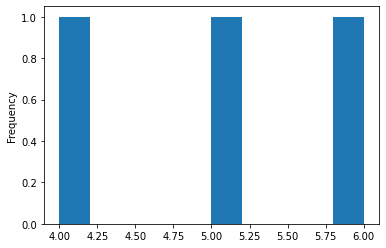

In [ ]:
# histogram for a single column of a data frame
df = pd.DataFrame(
  {"a": [4, 5, 6],
   "b": [7, 8, 9],
   "c": [10, 11, 12]},
   index = [1, 2, 3]
  )
df["a"].plot(kind = "hist")

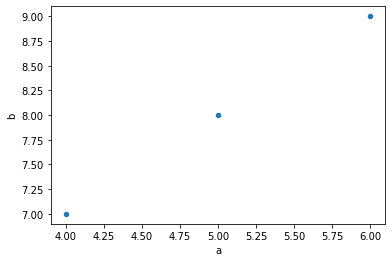

In [ ]:
# scatter plot using pairs of points of a data frame
df.plot(kind = "scatter", x = "a", y = "b")

## Merge data frames

In [ ]:
# create two datasets for demonstration
adf = pd.DataFrame(
  {"x1": ["A", "B", "C"],
   "x2": [1, 2, 3]}
  )
bdf = pd.DataFrame(
  {"x1": ["A", "B", "D"],
   "x3": ["T", "F", "T"]}
  )
print(adf)
print(bdf)

  x1  x2
0  A   1
1  B   2
2  C   3
  x1 x3
0  A  T
1  B  F
2  D  T


In [ ]:
# join matching rows from bdf to adf
pd.merge(adf, bdf, how = "left", on = "x1")

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [ ]:
# join data, retaining only rows in both sets
pd.merge(adf, bdf, how = "inner", on = "x1")

,x1,x2,x3
0,A,1,T
1,B,2,F


In [ ]:
# join data, retaining all rows in both sets
pd.merge(adf, bdf, how = "outer", on = "x1")

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [ ]:
# filtering join: all rows in adf that have a match in bdf
adf[adf["x1"].isin(bdf["x1"])]

,x1,x2
0,A,1
1,B,2


In [ ]:
# fitering join: all rows in adf that do not have a match in bdf (~ denotes not)
adf[~adf["x1"].isin(bdf["x1"])]

,x1,x2
2,C,3


## Optional: Set-like merges

In [ ]:
# create two datasets for demonstration
yf = pd.DataFrame(
  {"x1": ["A", "B", "C"],
   "x2": [1, 2, 3]}
  )
zf = pd.DataFrame(
  {"x1": ["B", "C", "D"],
   "x2": [2, 3, 4]}
  )
print(yf)
print(zf)

  x1  x2
0  A   1
1  B   2
2  C   3
  x1  x2
0  B   2
1  C   3
2  D   4


In [ ]:
# rows that appear in both datasets (intersection)
pd.merge(yf, zf)

,x1,x2
0,B,2
1,C,3


In [ ]:
# rows that appear in either dataset (union)
pd.merge(yf, zf, how = "outer")

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [ ]:
# rows that appear in yf but not zf (setdiff)
# this also demonstrates the chaining method
(pd.merge(yf, zf, how = "outer", indicator = True)
 .query('_merge == "left_only"')
 .drop(columns = ["_merge"]))

,x1,x2
0,A,1


## Optional: Iteration

In [ ]:
# iterate (column name, item) pairs (items are values of a particular column)
df_iter = pd.DataFrame(
  {'age': [20, 32],
   'state': ['NY', 'CA'],
   'point': [64, 92]},
   index = ['Alice', 'Bob'])
print(df_iter)
print()
for col_name, item in df_iter.iteritems():
  print(col_name)
  print(item)

       age state  point
Alice   20    NY     64
Bob     32    CA     92

age
Alice    20
Bob      32
Name: age, dtype: int64
state
Alice    NY
Bob      CA
Name: state, dtype: object
point
Alice    64
Bob      92
Name: point, dtype: int64


In [ ]:
# iterate (row index, item) pairs (items are values of a particular row)
for row_index, item in df_iter.iterrows():
  print(row_index)
  print(item)

Alice
age      20
state    NY
point    64
Name: Alice, dtype: object
Bob
age      32
state    CA
point    92
Name: Bob, dtype: object
